# Lab 01

# Tensorflow

[Tensorflow](https://www.tensorflow.org/) is a computational framework for building machine learning models. 

Before we use Tensorflow it is (obviously) neccessary to understand what Tensorflow is.

**Tensorflow = [Tensor](https://www.tensorflow.org/guide/tensors) + [Flow](https://www.tensorflow.org/guide/graphs)**(will learn more about this later)

## Tensor
A [tensor](https://www.tensorflow.org/guide/tensors) is a generalization of vectors and matrices to potentially higher dimensions.

A [tf.Tensor](https://www.tensorflow.org/api_docs/python/tf/Tensor) has the following properties : (<https://www.tensorflow.org/guide/tensors>)
*   a data type (float32, int32, or string, for example)
*   a shape



![Tensor_Rank](https://drive.google.com/uc?id=1o5wulLHGxUuPxH3t3xfV8U7d2CrsL1oG)





### Importing tensorflow library
[Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb) has tensorflow library installed as default so you just need to import it as below:

In [0]:
import tensorflow as tf

## Constant
WIth Tensorflow, we will be implementing lots of models. [Constant](https://www.tensorflow.org/api_docs/python/tf/constant) is a typical value that we need to set for the model. Any dimensional tensors can be declared.

In [0]:

with tf.Session() as sess:
  # Scalar (0 Rank)
  x0 = tf.constant(2.1)
  print (tf.rank(x0).eval(), " : ",  tf.shape(x0).eval())
#   print (tf.get_default_session().run(tf.rank(x0)), " : ",  tf.get_default_session().run(tf.shape(x0)))
  

  # Vector (1 Rank)
  x1 = tf.constant([-1.3, 4.22, 8.0, 9.3])
  print (tf.rank(x1).eval(), " : ",  tf.shape(x1).eval())


  # Matrix (2 Rank)
  x2 = tf.constant([[-1.3, 4.22, 8.0, 9.3],
                  [-4.3, 0.12, 37.0, 14.3],
                  [2.3, 5.4, 28.0, 22.4],
                  [9.3, -6.2, 88.2, 31.8]])
  print (tf.rank(x2).eval(), " : ",  tf.shape(x2).eval())


  # Cube (3 Rank)
  x3 = tf.stack([x2,x2,x2,x2])
  print (tf.rank(x3).eval(), " : ",  tf.shape(x3).eval())


  # Vector of cubes (4 Rank)
  x4 = tf.stack([x3,x3,x3,x3])
  print (tf.rank(x4).eval(), " : ",  tf.shape(x4).eval())


  # and so on...

0  :  []
1  :  [4]
2  :  [4 4]
3  :  [4 4 4]
4  :  [4 4 4 4]


More info: [stack()](https://www.tensorflow.org/api_docs/python/tf/stack), [rank()](https://www.tensorflow.org/api_docs/python/tf/rank), [shape()](https://www.tensorflow.org/api_docs/python/tf/shape), eval(x0) is a shorcut of tf.get_default_session().run(x0)

## Variable
[Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) will be changed as the TensorFlow program runs. 

Why Variable is *Capitalised* (whereas constant is not)?

*   Variable is a class that contains many operations
*   constant is an operation



In [0]:
# Variable 
W1 = tf.ones((3,3))
W2 = tf.Variable(tf.zeros((3,3)), name="weights")  

with tf.Session() as sess:   
  
  print("W1 : ")
  print(sess.run(W1))   
  sess.run(tf.global_variables_initializer())   
  
  print("W2 : ")
  print(sess.run(W2))


Instructions for updating:
Colocations handled automatically by placer.
W1 : 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
W2 : 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


More info: [zeros()](https://www.tensorflow.org/api_docs/python/tf/zeros) 


### tf.Variable() vs tf.get_variable()

[Tensorflow Guide](https://www.tensorflow.org/guide/variables) suggests to create a variable using tf.get_variable(). It reuses a previously created variable of the same name, making it easy to define models which reuse layers.

*   tf.Variable() will always create a new variable whereas 
*   tf.get_variable() will check the variable with the given parameters exists. If not, new variable will be created.



In [0]:
var1 = tf.Variable(tf.zeros((3,3)), name="variable1")  
print(var1)
#You can see the name of the variable will be changed if you run the code again.
# variable1, variable1_1, variable1_2, ...


<tf.Variable 'variable1:0' shape=(3, 3) dtype=float32_ref>


In [0]:
####

####

var2 = tf.get_variable("variable2", initializer=tf.zeros((3,3))) 
print(var2) 
#You will get an error if you run this bit of codes more than once. The "variable2" was created so it cannot be created again.

#To prevent this error, you could add the following line before calling get_variable(). 
# tf.reset_default_graph()

<tf.Variable 'variable2:0' shape=(3, 3) dtype=float32_ref>


## Session
**[Session](https://www.tensorflow.org/api_docs/python/tf/Session)** encapsulates the state of the environment in which Operation objects are executed, and Tensor objects are evaluated. Before the actual operation is executed with the Session, the tensor with operation is just an object that contains object that you encapsulated. Once you run it with the session, you can get the actual output that you want to get.

In [0]:
# Without Session
a = 1
b = 2
c = tf.add(a,b)

print(c)

Tensor("Add:0", shape=(), dtype=int32)


In [0]:
# With Session
a = 1
b = 2
c = tf.add(a,b)

with tf.Session() as sess:
  print(sess.run(c))
  
sess.close()

3


## Placeholder
[Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) is a variable that can be assigned later (in the runtime). This means it does not have to contain initial value for the operation. We can assign the value with "feed_dict" argument inside [Session.run()](https://www.tensorflow.org/api_docs/python/tf/Session#run)



In [0]:
# a list values for placeholder x
input1 = [1.0, 2.5, 3.0, 4.5, 5.0]
input2 = [1.5, 2.5, 10.0, 14.5, 15.0]

# placeholder x with datatype float32
x = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
y = 10 * x + b

with tf.Session() as sess:
  print (sess.run(y, feed_dict={x: input1, b: input2}))


[11.5 27.5 40.  59.5 65. ]


## Linear Regression

![Linear_Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

The following code implements a simple linear regression algorithm.

Instructions for updating:
Use tf.cast instead.
Epoch: 0000 cost= 44144624.00000000 W= 2281.2305 b= 157.3498
Epoch: 0200 cost= 196622.60937500 W= 1532.3431 b= -94.3427
Epoch: 0400 cost= 189554.68750000 W= 1540.5999 b= -211.6969
Epoch: 0600 cost= 187072.51562500 W= 1545.4930 b= -281.2446
Epoch: 0800 cost= 186200.50000000 W= 1548.3928 b= -322.4606
Epoch: 1000 cost= 185894.42187500 W= 1550.1113 b= -346.8866
Epoch: 1200 cost= 185786.75000000 W= 1551.1298 b= -361.3619
Epoch: 1400 cost= 185749.21875000 W= 1551.7334 b= -369.9405
Epoch: 1600 cost= 185735.64062500 W= 1552.0911 b= -375.0244
Epoch: 1800 cost= 185731.17187500 W= 1552.3031 b= -378.0372
Epoch: 2000 cost= 185729.54687500 W= 1552.4288 b= -379.8227
Epoch: 2200 cost= 185728.92187500 W= 1552.5032 b= -380.8811
Epoch: 2400 cost= 185728.73437500 W= 1552.5474 b= -381.5082
Epoch: 2600 cost= 185728.48437500 W= 1552.5735 b= -381.8798
Epoch: 2800 cost= 185728.68750000 W= 1552.5890 b= -382.1000
Epoch: 3000 cost= 185728.59375000 W= 1552.5981 b= -3

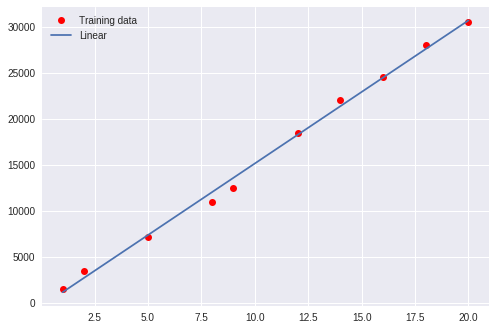

Testing cost= 141636.1
Absolute mean square loss difference: 44092.453


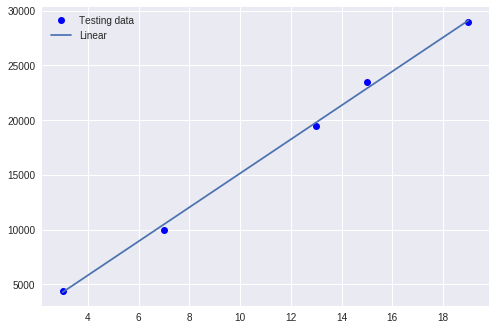

In [0]:
import numpy
import matplotlib.pyplot as plt

# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

# training data
x_training = numpy.asarray([1,2,5,8,9,12,14,16,18,20])
y_training = numpy.asarray([1500,3500,7200,11000,12500,18500,22000,24500,28000,30500])

# Set variables for the model
W = tf.Variable(numpy.random.randn(), name="Weight")
b = tf.Variable(numpy.random.randn(), name="bias")

# Placeholders for the model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Hypothesis = W * X + b (Linear Model)
H = tf.add(tf.multiply(W, X), b)

# Cost for calculating the model performance 
cost = tf.reduce_sum(tf.pow(H-Y, 2))/(2*x_training.shape[0])

# Gradient descent optimizer with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Target (training model) to be executed
train_model = optimizer.minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  
  sess.run(init)
  
  # Every epoch, the model will be modified by the given learning rate
  for epoch in range(no_of_epochs):
    sess.run(train_model, feed_dict={X:x_training, Y:y_training})    
    # every display_interval loop, the training information will be displayed
    if epoch % display_interval == 0 :
      # calculate the cost of the current model
      c = sess.run(cost, feed_dict={X:x_training, Y:y_training})            
      print("Epoch:", '%04d' % (epoch), "cost=", "{:.8f}".format(c), \
                "W=", "{:.4f}".format(sess.run(W)), "b=",  "{:.4f}".format(sess.run(b)))

  print("=========================================================")
  training_cost = sess.run(cost, feed_dict={X:x_training, Y:y_training})
  print("Optimised:", "cost=", "{:.9f}".format(training_cost), \
                "W=", sess.run(W), "b=", sess.run(b))
      
  # Plot training data on the graph
  plt.plot(x_training, y_training, 'ro', label='Training data')
  plt.plot(x_training, sess.run(W) * x_training + sess.run(b), label='Linear')
  plt.legend()
  plt.show()

  x_test = numpy.asarray([3,7,13,15,19])
  y_test = numpy.asarray([4400,10000,19500,23500,29000])
  
  # Calculate testing cost
  testing_cost = sess.run(
      tf.reduce_mean(tf.square(H - Y)),
      feed_dict={X: x_test, Y: y_test}) 
  print("Testing cost=", testing_cost)
  print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
  # Plot testing data on the graph
  plt.plot(x_test, y_test, 'bo', label='Testing data')
  plt.plot(x_test, sess.run(W) * x_test + sess.run(b), label='Linear')
  plt.legend()
  plt.show()

More info:
[GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer), 

# NLTK Library and WordNet

WordNet® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept.

In Python, NLTK library includes English WordNet.

**To use wordnet, you need to download the wordnet data via NLTK library**

 * **[NLTK](https://www.nltk.org/)** is a **N**atural **L**anguage **T**ool**k**iit for python. 

In [0]:
import nltk

## WordNet

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.corpus import wordnet as wn

Let's get a set of synonyms that share a common meaning.

In [0]:
dog = wn.synset('dog.n.01')
person = wn.synset('person.n.01')
cat = wn.synset('cat.n.01')
computer = wn.synset('computer.n.01')

### path_similarity()
path_similarity() returns a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1.

In [0]:
print("dog<->cat : ", wn.path_similarity(dog,cat))
print("person<->cat : ", wn.path_similarity(person,cat))
print("person<->dog : ", wn.path_similarity(person,dog))
print("person<->computer : ", wn.path_similarity(person,computer))

dog<->cat :  0.2
person<->cat :  0.1
person<->dog :  0.2
person<->computer :  0.1111111111111111


### Wu-Palmer Similarity (wup_similarity() )
wup_similarity() returns a score denoting how similar two word senses are, based on the depth of the two senses in the taxonomy and that of their Least Common Subsumer (most specific ancestor node).

In [0]:
print("dog<->cat : ", wn.wup_similarity(dog,cat))
print("person<->cat : ", wn.wup_similarity(person,cat))
print("person<->dog : ", wn.wup_similarity(person,dog))
print("person<->computer : ", wn.wup_similarity(person,computer))

dog<->cat :  0.8571428571428571
person<->cat :  0.5714285714285714
person<->dog :  0.75
person<->computer :  0.5


# Exercise

Write a program to find the most and the least similar words by nesting its synonyms or antonyms. To compare words, you can use two similarity measurement functions (path_similarity() and wup_similarity()). Please give a nesting limit so that your program cannot nest more than 6 times (as argument and should have default value). 

Useful information: [NLTK-WordNet](http://www.nltk.org/howto/wordnet.html#synsets)

Note. Some words do not have antonyms (dog, cat, person, computer, etc.)



In [0]:
# You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# You can write extra functions

def find_similar_words(word, max_nesting=6):
  similar_words = {
      "least":"",
      "most":""
  }
  
  # we proposed word is str
  # a iterator to go through the result tree
  # and return the list of all non-repeating nodes
  def iterator(word, max_nesting, wordbag):
    
    # find word's synonyms and antonyms
    synonyms = []
    antonyms = []
    
    for syn in wn.synsets(word):
      for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        for ant in lemma.antonyms():
          antonyms.append(ant.name())

    synonyms = list(set(synonyms))
    antonyms = list(set(antonyms))

    # the controller of iterator
    if max_nesting > 0:
      max_nesting -= 1
      for syn in synonyms:
        if syn not in wordbag:
          wordbag.append(syn)
          iterator(syn, max_nesting, wordbag)

      for ant in antonyms:
        if ant not in wordbag:
          wordbag.append(ant)
          iterator(ant, max_nesting, wordbag)
   
  # get result and fill into the word bag, 
  # but remove the word itself
  wordbag = []
  iterator(word, max_nesting, wordbag)
  if word in wordbag:
    wordbag.remove(word)
  
  # comepare the similarity between word with items in wordbag
  # use the avg(similarity) of all meanings of each word as the total similarity
  # and ouput the result in the dict: similar_words
  least, most= 1, 0
  word_syns = wn.synsets(word)
  for item in wordbag:
    sum_simi = 0
    count = 0
    for word_syn in word_syns:
      for item_syn in wn.synsets(item):
        simi = wn.wup_similarity(item_syn, word_syn)
#         simi = wn.wup_similarity(word_syn, item_syn)
        if simi: 
          count += 1
          sum_simi += simi
    if count > 0:
      simi = sum_simi/count
      if simi:
        if simi < least:
          least = simi
          similar_words["least"] = item

        if simi > most:
          most = simi
          similar_words["most"] = item
      
  return similar_words

In [0]:
# A sample
find_similar_words('dog', max_nesting=6)

{'least': 'scurvy', 'most': 'domestic_dog'}

# Extension
Test your program with 10 different words (selects randomly by yourself) and find the reasonable threshold limit for the number of nestings (by changing value for max_nesting argument)

In [0]:
# This is an extension task. You do not need to submit this task for your assessment.

words = ["test", "program", "ten", "different", "word", "assessment", "limit", "number", "nesting", "value"]
print("The length of word list is:", len(words))

max_nesting = 6
print("The max nesting is:", max_nesting)

table = []
for word in words:
  similar_words = find_similar_words(word, max_nesting)
  table.append([word, similar_words["least"], similar_words["most"]])
  

import pandas as pd
table = pd.DataFrame(table)
table.columns = ['word','least','most']
table

The length of word list is: 10
The max nesting is: 6


,word,least,most
0,test,screen_door,psychometric_test
1,program,everlasting,syllabus
2,ten,gaffer,10
3,different,standardised,dissimilar
4,word,jolly_boat,word_of_honor
5,assessment,pinnace,touch_sensation
6,limit,entice,limit_point
7,number,outlawed,human_race
8,nesting,nose,nest
9,value,kitchen_stove,economic_value


In [0]:
def similarity(word1, word2):
  count = 0
  sum_simi = 0
  similarity = 0
  for word1_syn in wn.synsets(word1):
    for word2_syn in wn.synsets(word2):
      simi = wn.wup_similarity(word2_syn,word1_syn)
      if simi: 
        count += 1
        sum_simi += simi
  if count > 0:
    similarity = sum_simi/count
  return similarity

In [0]:
import random
colors =  ['g', 'm', 'b', 'c', 'r', 'k', 'y']
forms = ['-','--','-.',':']

def random_format():
  color = colors[random.randint(0, len(colors)-1)]
  return [color+'-', color+':']

In [0]:
# This is an extension task. You do not need to submit this task for your assessment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

max_nesting = 10
# words = ["test", "program", "ten", "different", "word", "assessment", "limit", "number", "nesting", "value"]
words = ["ten", "word", "assessment", "number", "value"]

print("The length of word list is:", len(words))

result = {}
for word in words:
  result[word] = []

for nest in range(0, max_nesting):
#   if nest%10 == 9:
  print(nest)
  
  for word in words:
    similar_words = find_similar_words(word, nest)
    result[word].append([nest, similarity(word, similar_words["least"]), similarity(word, similar_words["most"])])
 
print('end')

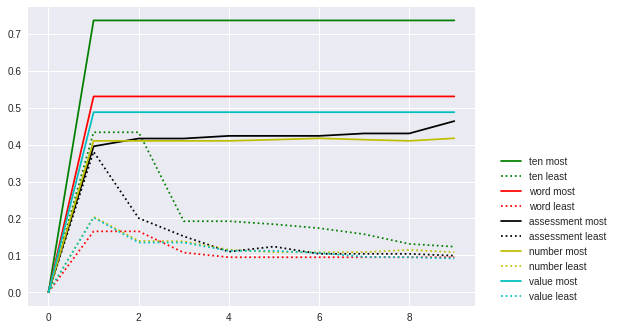

In [0]:
words = ["ten", "word", "assessment", "number", "value"]
for word in words:
  table1 = pd.DataFrame(result[word])
  table1.columns = ['nest','least','most']
  form = random_format()
  
  plt.plot(table1['nest'], table1['most'], form[0], label=word + ' most')
  plt.plot(table1['nest'], table1['least'], form[1], label=word + ' least')

plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()